In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv("C:/Users/dell/Downloads/abalone.csv")

df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [7]:
df.shape

(4177, 9)

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

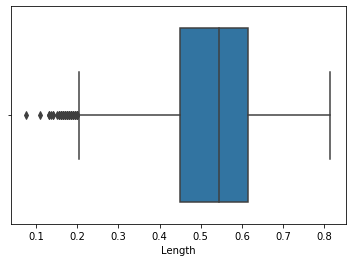

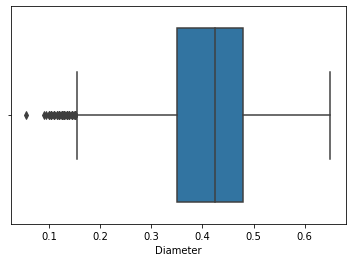

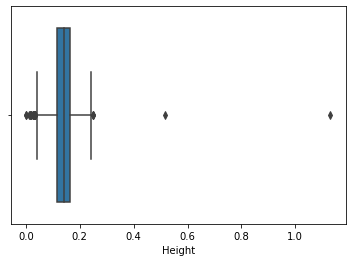

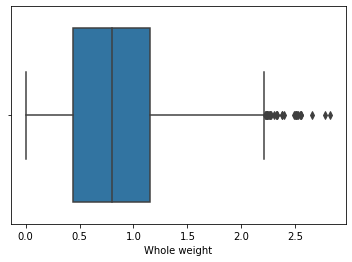

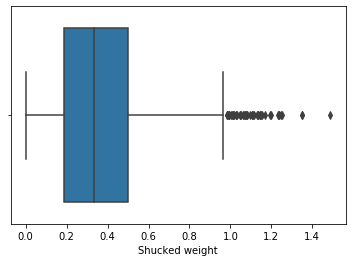

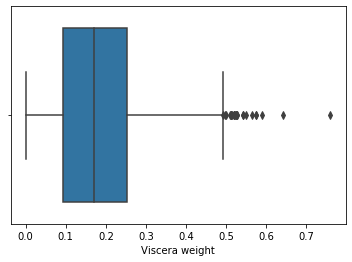

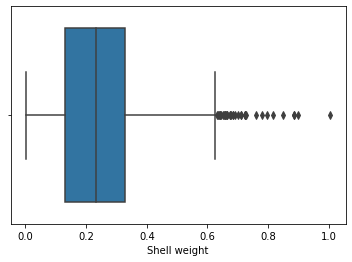

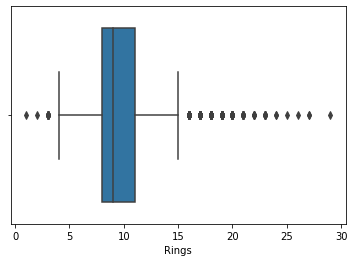

In [17]:
for i in df.iloc[:,1:].columns:
    sns.boxplot(df[i])
    plt.show()
    

In [3]:
for i in df.iloc[:,1:].columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    df.loc[df[i]<ll,i]=df[i].quantile(0.05)
    df.loc[df[i]>ul,i]=df[i].quantile(0.99)

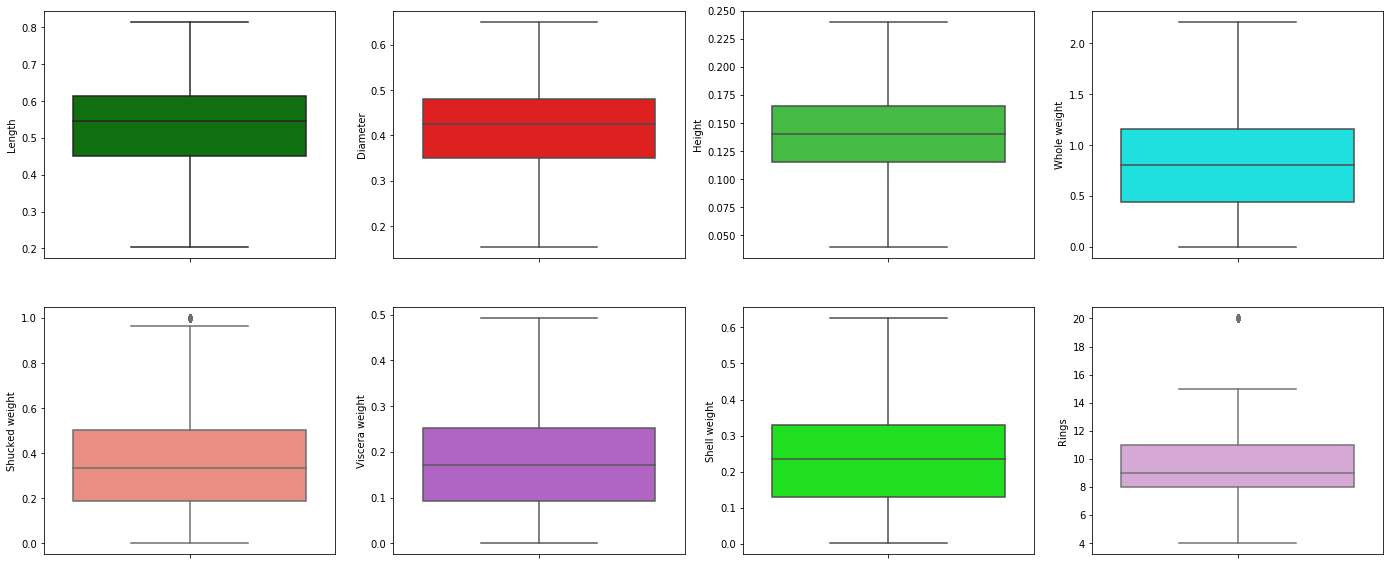

In [41]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'Rings', data = df, color = 'plum')
plt.show()

In [4]:
df=pd.get_dummies(df,columns=["Sex"],drop_first=True)

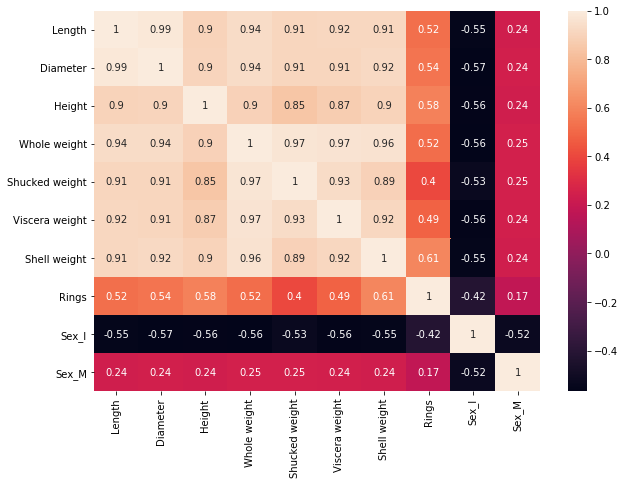

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

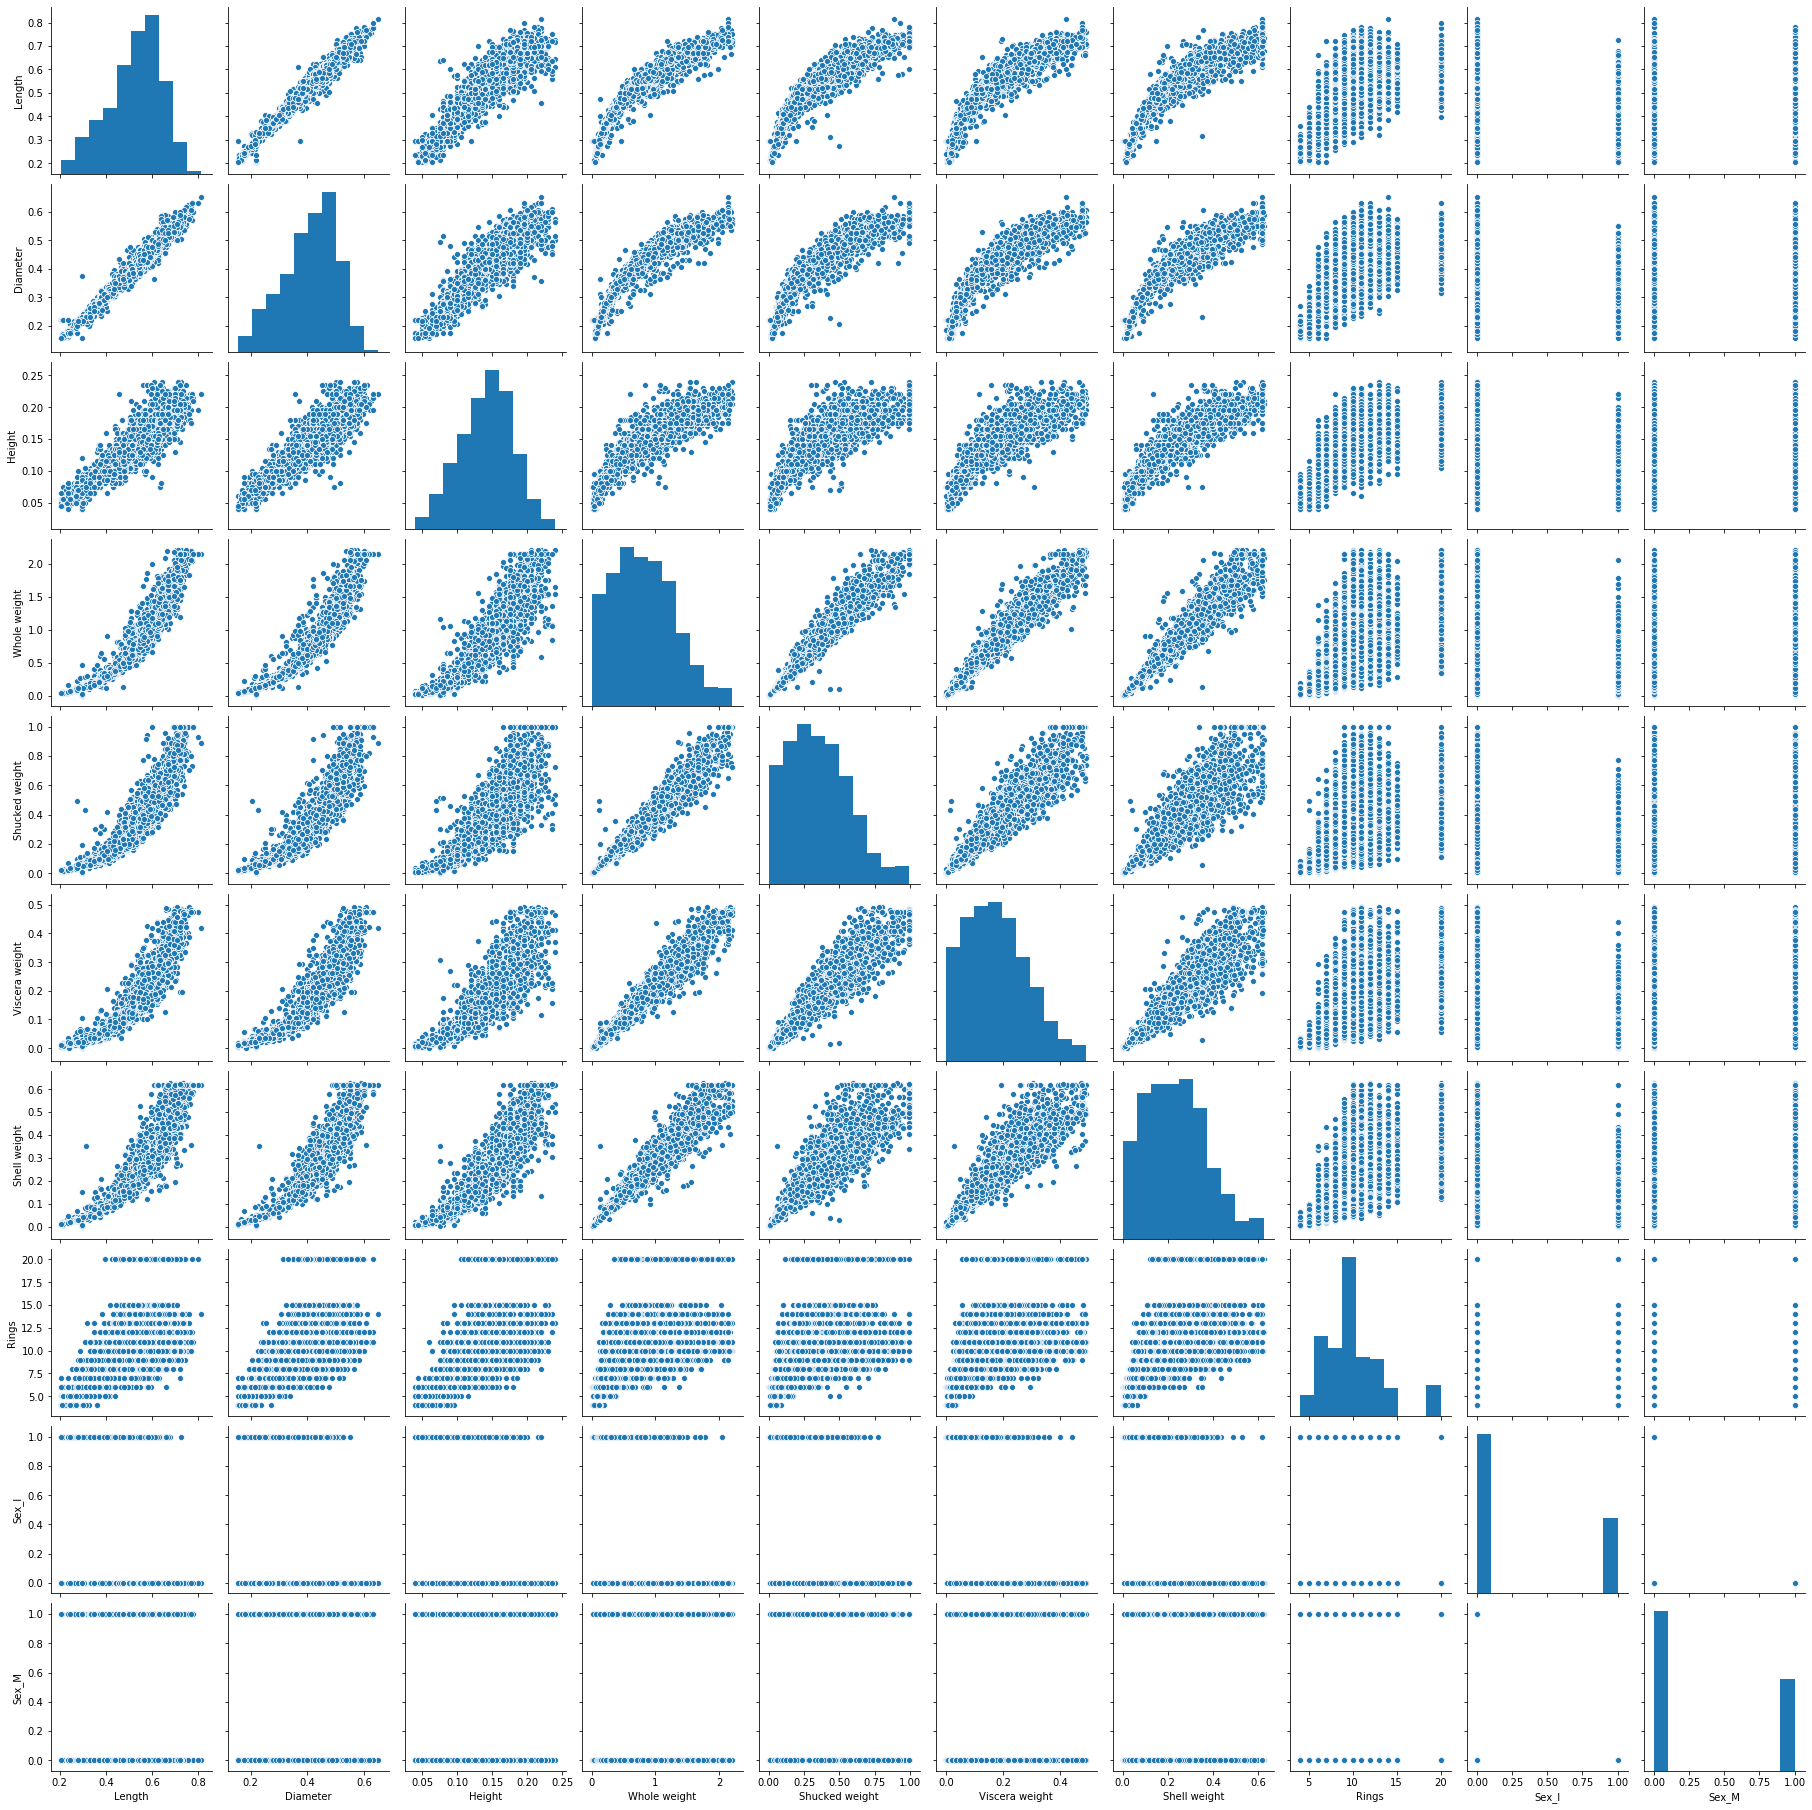

In [52]:
sns.pairplot(df)

In [5]:
# Scaling the input

sc=StandardScaler()

scaled_inp=sc.fit_transform(df.iloc[:,:7])

scaled_inp=pd.DataFrame(scaled_inp,columns=df.iloc[:,:7].columns)

In [7]:
x=pd.concat([scaled_inp,df[["Sex_I","Sex_M"]]],1)
y=df.Rings

In [27]:
x.head(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M
0,-0.605190,-0.460043,-1.177811,-0.645640,-0.614086,-0.731276,-0.645565,0,1
1,-1.507068,-1.501110,-1.310165,-1.240969,-1.188816,-1.216121,-1.232534,0,1
2,0.039009,0.112543,-0.118982,-0.309284,-0.466955,-0.357254,-0.205338,0,0


### KNN Regressor

In [28]:
knn=KNeighborsRegressor()

params={"n_neighbors":np.arange(1,50),"weights":["distance","uniform"]}

grid=GridSearchCV(knn,params,cv=5,scoring="neg_mean_squared_error")

grid.fit(x,y)

grid.best_params_

{'n_neighbors': 17, 'weights': 'distance'}

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=5)

In [31]:
knn=KNeighborsRegressor(n_neighbors=17,weights="distance")

knn_model=knn.fit(xtrain,ytrain)

ypred_knn_train=knn_model.predict(xtrain)

ypred_knn_test=knn_model.predict(xtest)

r2_score(ytrain,ypred_knn_train),r2_score(ytest,ypred_knn_test) # It is overfitted as the test results are very poor

(1.0, 0.48179668320788693)

In [32]:
mean_squared_error(ytrain,ypred_knn_train),mean_squared_error(ytest,ypred_knn_test)

(0.0, 6.267343197217672)

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()

params={"max_depth":np.arange(1,40)}

grid=GridSearchCV(DT,params,cv=5,scoring="neg_mean_squared_error")

grid.fit(x,y)

grid.best_params_

{'max_depth': 5}

In [36]:
DT=DecisionTreeRegressor(max_depth=5)

dt_model=DT.fit(xtrain,ytrain)

ypred_dt_train=dt_model.predict(xtrain)

ypred_dt_test=dt_model.predict(xtest)

r2_score(ytrain,ypred_dt_train),r2_score(ytest,ypred_dt_test)

(0.5406331717902477, 0.43297243785299655)

In [43]:
mean_squared_error(ytrain,ypred_dt_train),mean_squared_error(ytest,ypred_dt_test)

(5.455684610543043, 6.857841737208716)

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor

In [55]:
RF=RandomForestRegressor()

params={"n_estimators":np.arange(1,40)}

grid=GridSearchCV(RF,params,cv=5,scoring="neg_mean_squared_error")

grid.fit(x,y)

grid.best_params_

{'n_estimators': 38}

In [56]:
RF=RandomForestRegressor(n_estimators=38)

rf_model=RF.fit(xtrain,ytrain)

ypred_rf_train=rf_model.predict(xtrain)

ypred_rf_test=rf_model.predict(xtest)

r2_score(ytrain,ypred_rf_train),r2_score(ytest,ypred_rf_test)

(0.9286088675901836, 0.47967791893211376)

In [57]:
mean_squared_error(ytrain,ypred_rf_train),mean_squared_error(ytest,ypred_rf_test)

(0.8478790337025197, 6.292968318555139)

### Gradient Boost

In [62]:
GB=GradientBoostingRegressor()

params={"n_estimators":range(1,150)}

grid=GridSearchCV(GB,params,cv=5,scoring="neg_mean_squared_error")

grid.fit(x,y)

grid.best_params_

{'n_estimators': 120}

In [11]:
GB=GradientBoostingRegressor(n_estimators=120)

gb_model=GB.fit(xtrain,ytrain)

ypred_gb_train=gb_model.predict(xtrain)

ypred_gb_test=gb_model.predict(xtest)

r2_score(ytrain,ypred_gb_train),r2_score(ytest,ypred_gb_test)

(0.6715654646807898, 0.4955382939334355)

In [12]:
mean_squared_error(ytrain,ypred_gb_train),mean_squared_error(ytest,ypred_gb_test)

(3.90066310816352, 6.101147058156428)